https://machinelearningmastery.com/machine-learning-in-python-step-by-step/



In [26]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline
import seaborn

# Load libraries

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:28:17) 
[GCC 7.2.0]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2
pandas: 0.23.0
sklearn: 0.19.1


In [27]:
# read CSV of single game data

data = pd.read_csv('anderson game log.csv', header=0)
data = data.dropna()
data.head

<bound method NDFrame.head of            AGE  FG  FGA  THREEP  THREEPA  FT  FTA  ORB  DRB  TRB  AST  STL  \
0    21.115068   1    8       0        2   2    3    0    8    8    4    2   
1    21.126027   0    0       0        0   0    0    0    0    0    0    0   
2    21.128767   0    2       0        0   0    0    0    1    1    0    0   
3    21.136986   0    4       0        2   0    0    0    3    3    1    0   
4    21.145205   1    7       0        1   0    0    0    3    3    0    0   
5    21.156164   0    2       0        0   0    0    0    2    2    1    0   
6    21.158904   0    0       0        0   0    0    0    0    0    1    0   
7    21.180822   0    1       0        0   0    0    0    1    1    0    1   
8    21.183562   0    0       0        0   0    0    0    0    0    0    0   
9    21.197260   1    3       0        0   1    2    0    5    5    1    0   
10   21.208219   4    5       1        2   0    0    1    4    5    3    2   
11   21.213699   3    6       0   

In [30]:
# Look at the variable names 

variablenames = data.keys()
print (variablenames)

Index(['AGE', 'FG', 'FGA', 'THREEP', 'THREEPA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PlusMinus',
       'PositivePlus', 'MP'],
      dtype='object')


In [31]:
# descriptions
print(data.describe())

              AGE          FG         FGA      THREEP     THREEPA          FT  \
count  257.000000  257.000000  257.000000  257.000000  257.000000  257.000000   
mean    23.036501    1.918288    4.011673    0.190661    0.564202    0.856031   
std      1.033505    1.853295    2.992807    0.412962    0.788567    1.424771   
min     21.115068    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     22.263014    0.000000    2.000000    0.000000    0.000000    0.000000   
50%     23.197260    1.000000    4.000000    0.000000    0.000000    0.000000   
75%     24.115068    3.000000    6.000000    0.000000    1.000000    2.000000   
max     24.545205    9.000000   14.000000    2.000000    4.000000    8.000000   

              FTA         ORB         DRB         TRB         AST         STL  \
count  257.000000  257.000000  257.000000  257.000000  257.000000  257.000000   
mean     1.167315    0.571984    3.007782    3.579767    1.727626    0.937743   
std      1.754242    0.9076

In [32]:
# check correlations

data.corr()

,AGE,FG,FGA,THREEP,THREEPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PlusMinus,PositivePlus,MP
AGE,1.000000,0.352525,0.324645,0.143786,0.198118,0.220057,0.250685,0.372895,0.277790,0.365584,0.341646,0.307458,0.257473,0.275266,0.165132,0.380406,0.064775,0.065949,0.494517
FG,0.352525,1.000000,0.838953,0.301152,0.274899,0.248496,0.303397,0.352984,0.422581,0.484905,0.463172,0.373636,0.260089,0.334323,0.332901,0.947860,0.197909,0.162377,0.657175
FGA,0.324645,0.838953,1.000000,0.273166,0.439129,0.277054,0.335185,0.433232,0.519877,0.596210,0.493838,0.401391,0.285669,0.302453,0.369954,0.819258,0.104120,0.082048,0.760958
THREEP,0.143786,0.301152,0.273166,1.000000,0.592017,0.007001,-0.028031,0.083085,0.221518,0.220298,0.215846,0.218067,0.165276,0.043010,0.106229,0.348609,0.222776,0.138529,0.304198
THREEPA,0.198118,0.274899,0.439129,0.592017,1.000000,0.117777,0.115039,0.131317,0.281307,0.288336,0.322762,0.248452,0.170991,0.150769,0.123670,0.324157,0.102944,0.049755,0.384747
FT,0.220057,0.248496,0.277054,0.007001,0.117777,1.000000,0.933337,0.103190,0.287776,0.284613,0.287016,0.166058,0.107412,0.183618,0.189592,0.531964,0.187018,0.110749,0.392765
FTA,0.250685,0.303397,0.335185,-0.028031,0.115039,0.933337,1.000000,0.128559,0.287524,0.292827,0.305711,0.175096,0.157554,0.183256,0.230478,0.553265,0.156764,0.114138,0.430266
ORB,0.372895,0.352984,0.433232,0.083085,0.131317,0.103190,0.128559,1.000000,0.229865,0.532366,0.302287,0.145549,0.255094,0.211358,0.117751,0.337402,0.050551,-0.017921,0.426708
DRB,0.277790,0.422581,0.519877,0.221518,0.281307,0.287776,0.287524,0.229865,1.000000,0.946219,0.398882,0.413804,0.252771,0.270757,0.375735,0.468342,0.269771,0.167817,0.698509
TRB,0.365584,0.484905,0.596210,0.220298,0.288336,0.284613,0.292827,0.532366,0.946219,1.000000,0.447439,0.408314,0.304662,0.305767,0.365960,0.519528,0.251453,0.140011,0.749416


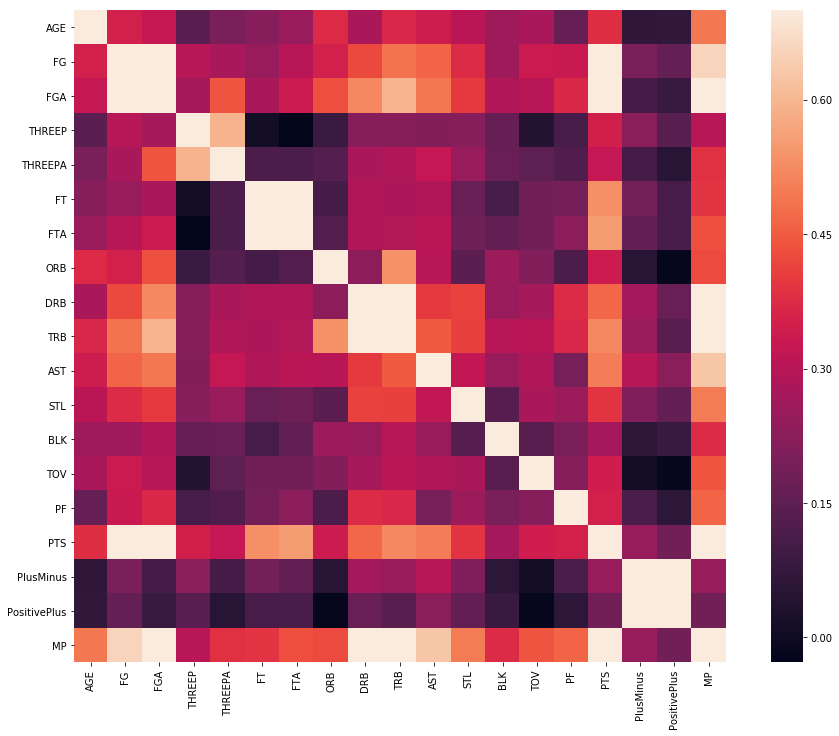

In [33]:
# Build the correlation matrix

matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
seaborn.heatmap(matrix, vmax=0.7, square=True)

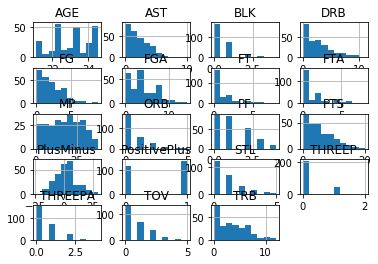

In [34]:
# histograms
data.hist()
plt.show()

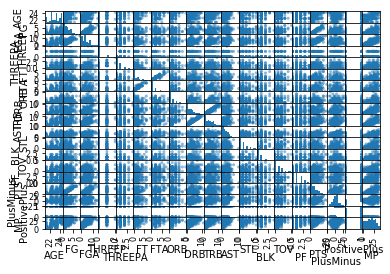

In [8]:
# scatter plot matrix
scatter_matrix(data)
plt.show()

In [13]:
# Regular regression to predict plusminus

model = smf.ols("PlusMinus ~ AGE + FG + FGA + THREEP + THREEPA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF + PTS + MP", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PlusMinus   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     4.858
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           2.98e-08
Time:                        15:40:51   Log-Likelihood:                -902.47
No. Observations:                 257   AIC:                             1837.
Df Residuals:                     241   BIC:                             1894.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2036     13.858      1.602      0.110      -5.094      49.501
AGE           -1.0665      0.622     -1.715      0.088      -2.292       0.159
FG            -0.4717      0.662     -0.713      0.477      -1.775       0.832
FGA           -1.6424      0.435     -3.779      0.000      -2.499      -0.786
THREEP         1.8429      1.573      1.172      0.242      -1.255       4.941
THREEPA       -0.1351      0.959     -0.141      0.888      -2.024       1.753
FT             0.2313      0.960      0.241      0.810      -1.660       2.123
FTA           -0.5843      0.886     -0.660      0.510      -2.329       1.160
ORB            0.3500      0.688      0.509      0.612      -1.006       1.706
DRB            0.6730      0.317      2.126      0.035       0.049       1.297
AST            1.2936      0.412      3.142      0.002       0.483       2.105
STL            0.7652      0.510      1.500      0.135      -0.240       1.770
BLK           -0.4744      0.791     -0.600      0.549      -2.033       1.084
TOV           -1.4297      0.613     -2.333      0.020      -2.637      -0.223
PF             0.1668      0.549      0.304      0.761      -0.914       1.248
PTS            1.1308      0.280      4.037      0.000       0.579       1.682
MP             0.1337      0.128      1.044      0.297      -0.119       0.386
==============================================================================
Omnibus:                        1.633   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.401
Skew:                           0.044   Prob(JB):                        0.496
Kurtosis:                       3.351   Cond. No.                     2.68e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
# Run only with variables that have significance below .1

model = smf.ols("PlusMinus ~ AGE + MP + FGA + DRB + AST + STL + TOV + PTS", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PlusMinus   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     8.745
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.61e-10
Time:                        17:17:12   Log-Likelihood:                -904.48
No. Observations:                 257   AIC:                             1827.
Df Residuals:                     248   BIC:                             1859.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5864     13.188      1.713      0.088      -3.388      48.561
AGE           -1.0842      0.593     -1.828      0.069      -2.252       0.084
MP             0.1386      0.118      1.176      0.241      -0.094       0.371
FGA           -1.6306      0.345     -4.724      0.000      -2.310      -0.951
DRB            0.6821      0.311      2.191      0.029       0.069       1.295
AST            1.2826      0.401      3.200      0.002       0.493       2.072
STL            0.8454      0.500      1.690      0.092      -0.140       1.830
TOV           -1.4915      0.595     -2.508      0.013      -2.663      -0.320
PTS            0.9077      0.215      4.223      0.000       0.484       1.331
==============================================================================
Omnibus:                        3.234   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.405
Skew:                           0.104   Prob(JB):                        0.182
Kurtosis:                       3.524   Cond. No.                         790.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
cols_to_keep = ['AGE', 'FG', 'FGA', 'THREEP', 'THREEPA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',]
logdata = data[cols_to_keep]
logdata.head

<bound method NDFrame.head of            AGE  FG  FGA  THREEP  THREEPA  FT  FTA  ORB  DRB  TRB  AST  STL  \
0    21.115068   1    8       0        2   2    3    0    8    8    4    2   
1    21.126027   0    0       0        0   0    0    0    0    0    0    0   
2    21.128767   0    2       0        0   0    0    0    1    1    0    0   
3    21.136986   0    4       0        2   0    0    0    3    3    1    0   
4    21.145205   1    7       0        1   0    0    0    3    3    0    0   
5    21.156164   0    2       0        0   0    0    0    2    2    1    0   
6    21.158904   0    0       0        0   0    0    0    0    0    1    0   
7    21.180822   0    1       0        0   0    0    0    1    1    0    1   
8    21.183562   0    0       0        0   0    0    0    0    0    0    0   
9    21.197260   1    3       0        0   1    2    0    5    5    1    0   
10   21.208219   4    5       1        2   0    0    1    4    5    3    2   
11   21.213699   3    6       0   

In [52]:
data['intercept'] = 1.0

In [53]:
train_cols = ['AGE', 'FGA', 'THREEPA', 'FTA', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'MP', 'intercept']

logit = smf.Logit(data['PositivePlus'], data[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.643103
         Iterations 5


In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PositivePlus   No. Observations:                  257
Model:                          Logit   Df Residuals:                      246
Method:                           MLE   Df Model:                           10
Date:                Sat, 22 Sep 2018   Pseudo R-squ.:                 0.06680
Time:                        19:11:51   Log-Likelihood:                -165.28
converged:                       True   LL-Null:                       -177.11
                                        LLR p-value:                  0.008551
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.1175      0.150     -0.783      0.433      -0.412       0.177
FGA           -0.1155      0.071     -1.618      0.106      -0.255       0.024
THREEPA       -0.0675      0.191     -0.353      0.724      -0.442       0.307
FTA            0.0595      0.085      0.698      0.485      -0.108       0.227
AST            0.2523      0.108      2.344      0.019       0.041       0.463
STL            0.2153      0.133      1.621      0.105      -0.045       0.476
BLK            0.0671      0.199      0.338      0.736      -0.323       0.457
TOV           -0.2979      0.153     -1.944      0.052      -0.598       0.002
PF            -0.0240      0.137     -0.175      0.861      -0.293       0.245
MP             0.0431      0.028      1.526      0.127      -0.012       0.098
intercept      2.1700      3.329      0.652      0.514      -4.354       8.694
==============================================================================
"""

In [55]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
AGE,0.662613,1.193050,0.889118
FGA,0.774665,1.024708,0.890958
THREEPA,0.642653,1.359577,0.934739
FTA,0.897926,1.254396,1.061299
AST,1.042233,1.589122,1.286948
STL,0.955912,1.609283,1.240295
BLK,0.724324,1.579036,1.069455
TOV,0.549716,1.002499,0.742354
PF,0.746010,1.277604,0.976271
MP,0.987840,1.103371,1.044008


In [33]:
train_cols = ['FGA', 'AST', 'TOV', 'intercept']

logit = smf.Logit(data['PositivePlus'], data[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.658662
         Iterations 5


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PositivePlus   No. Observations:                  257
Model:                          Logit   Df Residuals:                      253
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Sep 2018   Pseudo R-squ.:                 0.04422
Time:                        18:14:36   Log-Likelihood:                -169.28
converged:                       True   LL-Null:                       -177.11
                                        LLR p-value:                  0.001329
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FGA           -0.0165      0.051     -0.323      0.746      -0.117       0.084
AST            0.3444      0.099      3.470      0.001       0.150       0.539
TOV           -0.1840      0.141     -1.307      0.191      -0.460       0.092
intercept     -0.1824      0.225     -0.811      0.417      -0.623       0.258
==============================================================================
"""

In [35]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
FGA,0.889906,1.087191,0.983615
AST,1.161712,1.714296,1.411212
TOV,0.631384,1.096176,0.831930
intercept,0.536197,1.294894,0.833257


In [35]:
# Split-out validation dataset
array = data.values
X = array[:,0:16]
Y = array[:,16]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [85]:
help("array")

Help on module array:

NAME
    array

MODULE REFERENCE
    https://docs.python.org/3.6/library/array
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module defines an object type which can efficiently represent
    an array of basic values: characters, integers, floating point
    numbers.  Arrays are sequence types and behave very much like lists,
    except that the type of objects stored in them is constrained.

CLASSES
    builtins.object
        array
    
    ArrayType = class array(builtins.object)
     |  array(typecode [, initializer]) -> array
     |  
     |  Return a new array whose items are restricted by typecode, and
     |  initialized from the optional initializer value, whi

In [36]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [37]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.053333 (0.045353)


/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are colli

LDA: 0.058095 (0.055800)
KNN: 0.043571 (0.054159)
CART: 0.053571 (0.041160)
NB: 0.009762 (0.019531)
SVM: 0.058333 (0.046927)


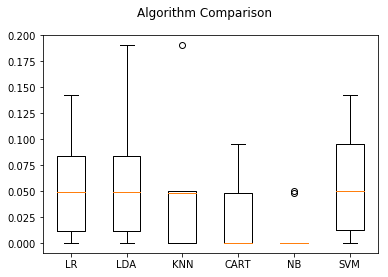

In [82]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [83]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.057692307692307696
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
             precision    recall  f1-score   support

      -18.0       0.00      0.00      0.00         0
      -17.0       0.00      0.00      0.00         0
      -16.0       0.00      0.00      0.00         0
      -14.0       0.00      0.00      0.00         0
      -12.0       0.00      0.00      0.00         1
      -11.0       0.00      0.00      0.00         1
      -10.0       0.33      0.25      0.29         4
       -9.0       0.00      0.00      0.00         0
       -8.0       0.00      0.00      0.00         2
       -7.0       0.00      0.00      0.00         0
       -6.0       0.00      0.00      0.00         1
       -5.0       0.00      0.00      0.00         1
       -4.0       0.00      0.00      0.00         2
       -3.0       0.00      0.00      0.00         2
       -2.0       0.00      0.00      0.00         1
       -1.

/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mrd/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
predictor_names=['AGE', 'FG', 'FGA', 'THREEP', 'THREEPA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP']
       
predictor_data = data[predictor_names]

predictor_data.head()

,AGE,FG,FGA,THREEP,THREEPA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP
0,21.115068,1,8,0,2,2,3,0,8,8,4,2,0,0,3,4,31.233333
1,21.126027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.400000
2,21.128767,0,2,0,0,0,0,0,1,1,0,0,1,0,1,0,6.950000
3,21.136986,0,4,0,2,0,0,0,3,3,1,0,0,0,0,0,10.533333
4,21.145205,1,7,0,1,0,0,0,3,3,0,0,1,1,3,2,21.233333


In [39]:
outcome_name = 'PlusMinus'
outcome_data = data[outcome_name]
outcome_data = outcome_data.values.ravel()
outcome_data

array([ -4,   3,  -1, -12,  -4,   0,  -3,   3,   6,  -4,   7,   5,  -1,
       -15,  -4,   6,  11,  -7,  -2,   3,   3, -10,  -6,   6,   1,   1,
        -5,  -3,  -2,  -2,  -7,  -4,   5, -10,   3,   0,   3,  11,   1,
        -8,   2,  20,   1,  -4,  -1,  -1,   2,   2,  19,  -9,  -8,   7,
         3,   5,  28,   1,   0,   1,  -2,   9,  -2,  14,   2,   4,   7,
         0,   0,   7,   7,  -2,   5,   7,  16,  -9, -10,  10,   4,  14,
         4,   4,   1,   1, -13,   1,  -4,  16,   5,  -2,   4,  -4,   7,
        -5, -10,  -4,   3,  14, -10, -10,  -3,  -1,   1,  -5,  18,   1,
         0,  21,   0,  -8,   4,  10,  17,  -4,  -9,  23,   7,  -7,  -2,
         1,  13,  10,  -4, -11,  -2,  -3,   0,   2,   3,   2,  -5,   7,
         3,  -6,   3,  16, -10,  -1,   8,   3,  14,   6, -10,  -4,   8,
        -1,  14,  10,  -4,   3,  19,  16,  -2, -18,   4,  -4,  15,   6,
        -4,  -4,  -1,  -1,  -6,  12,   0,   0,  -7,  14,  20,  -2,  -1,
         3,   2,   5,  -6,   9, -10,  -8,  24,  -4,   0,  16,  -

In [40]:
model = RandomForestRegressor(n_estimators=50,
                              max_features= .90,
                              max_depth = None,
                              min_samples_split = 2)

In [41]:
model.fit (X= predictor_data, y = outcome_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.9, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
folds = len(predictor_data)
scores = cross_val_score(model, predictor_data, outcome_data, cv=folds, scoring="neg_mean_absolute_error")

In [61]:
scores

array([-13.2 ,  -4.78,  -0.48, -10.06,  -0.64,  -1.98,  -4.94,  -2.6 ,
        -6.66,  -3.16,  -0.28,  -4.34,  -1.32, -22.44,  -2.42,  -5.68,
        -4.04,  -7.48,  -1.52,  -6.96,  -5.72, -13.32,  -6.62,  -7.56,
        -2.  ,  -1.84,  -4.94,  -1.7 ,  -1.34,  -0.26,  -6.76,  -5.52,
        -5.24, -10.34,  -5.02,  -0.5 ,  -5.3 , -11.72,  -3.92,  -5.16,
        -2.42, -14.12,  -0.74,  -3.1 ,  -3.6 ,  -3.26,  -3.68,  -3.3 ,
       -14.9 , -14.94,  -8.74,  -1.96,  -0.82,  -4.68, -24.06,  -0.26,
        -1.64,  -2.14,  -9.7 ,  -9.3 ,  -2.5 , -12.74,  -1.58,  -2.58,
        -0.84,  -1.08,  -0.04,  -5.6 ,  -3.06,  -2.24,  -5.8 ,  -0.86,
        -6.32,  -6.64, -15.26,  -3.72,  -1.7 ,  -3.42,  -4.1 ,  -0.92,
        -1.82,  -0.72, -15.8 ,  -9.66,  -7.  , -11.7 ,  -6.82,  -6.78,
        -3.76,  -7.22,  -7.16,  -9.9 ,  -8.56,  -4.9 ,  -6.36, -11.96,
       -16.22, -12.62,  -0.74,  -1.6 ,  -2.06, -12.18,  -8.02,  -0.16,
        -0.96, -13.28,  -6.26, -13.8 ,  -3.64,  -8.66,  -4.66,  -6.54,
      

In [44]:
print ("Average Prediction Error:")
average_mean_absolute_error = np.mean(scores)
print (average_mean_absolute_error)

print ("Standard Deviation of Errors:")
mean_absolute_error_std = np.std(scores)
print (mean_absolute_error_std)

Average Prediction Error:
-6.895719844357977
Standard Deviation of Errors:
5.903670457514474


<function matplotlib.pyplot.show(*args, **kw)>

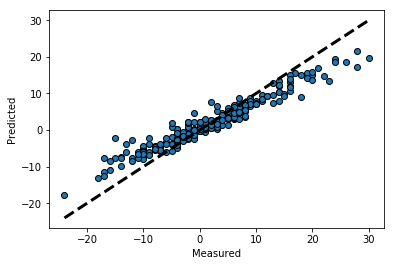

In [45]:
fig, ax = plt.subplots()
predicted = model.predict(predictor_data)
ax.scatter(outcome_data, predicted, edgecolors=(0, 0, 0))
ax.plot([outcome_data.min(), outcome_data.max()], [outcome_data.min(), outcome_data.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show

In [67]:
predicted

array([ 8.400e-01,  1.280e+00, -1.800e-01, -7.900e+00, -3.240e+00,
       -5.800e-01, -1.360e+00,  1.960e+00,  3.520e+00, -3.380e+00,
        6.880e+00,  4.720e+00, -5.400e-01, -8.060e+00, -4.040e+00,
        4.280e+00,  8.380e+00, -3.280e+00, -2.160e+00,  5.600e-01,
        7.400e-01, -5.600e+00, -4.540e+00,  3.620e+00,  3.000e-01,
        2.600e-01, -3.600e+00, -2.040e+00, -1.380e+00, -2.340e+00,
       -4.840e+00, -2.940e+00,  2.180e+00, -5.140e+00,  1.180e+00,
        2.400e-01,  1.500e+00,  7.540e+00,  2.000e-01, -5.120e+00,
        1.260e+00,  1.570e+01,  6.000e-02, -3.460e+00, -2.400e-01,
        1.460e+00,  5.200e-01,  8.800e-01,  1.502e+01, -1.400e-01,
       -4.980e+00,  5.700e+00,  3.000e+00,  3.800e+00,  1.946e+01,
        1.100e+00,  0.000e+00,  8.400e-01,  1.540e+00,  7.220e+00,
       -9.800e-01,  8.780e+00,  1.680e+00,  3.720e+00,  6.960e+00,
       -8.000e-02, -7.400e-01,  5.320e+00,  7.460e+00, -1.380e+00,
        3.100e+00,  7.580e+00,  1.396e+01, -5.340e+00, -2.880e

In [46]:
importances = model.feature_importances_
predictors = list(predictor_data)
zip(predictors,importances)

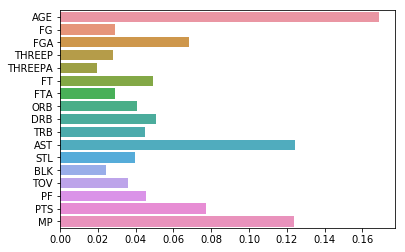

In [51]:
seaborn.barplot(x=importances, y=predictors)

In [29]:
predicted = model.predict(predictor_data)
predicted

array([ -0.5 ,   1.38,  -0.12,  -8.5 ,  -3.32,  -0.74,  -1.14,   2.1 ,
         3.74,  -2.84,   6.42,   6.3 ,  -0.36,  -5.98,  -2.7 ,   4.5 ,
         8.92,  -3.6 ,  -1.72,   0.22,   0.38,  -6.06,  -3.72,   3.18,
         0.46,  -0.5 ,  -3.44,  -2.12,  -1.14,  -2.02,  -5.56,  -1.74,
         2.46,  -6.08,   1.82,   0.46,   1.84,   7.36,   0.26,  -4.9 ,
         1.2 ,  14.58,   0.38,  -2.98,   0.4 ,   2.14,   0.12,  -0.22,
        12.76,  -3.22,  -5.26,   5.54,   3.22,   4.  ,  18.32,   1.4 ,
         0.4 ,   0.58,   0.46,   6.82,  -1.48,  11.04,   1.06,   2.6 ,
         6.92,  -0.26,  -0.42,   4.46,   8.1 ,  -0.7 ,   2.84,   6.42,
        14.18,  -8.2 ,  -4.36,   6.16,   4.58,  11.7 ,   2.66,   3.14,
         1.56,   0.2 , -10.14,   4.04,  -4.12,   7.38,   1.62,   3.1 ,
         5.38,  -1.9 ,   3.48,   0.68,  -7.74,  -1.38,   1.56,  10.38,
        -3.44,  -5.5 ,  -3.08,  -1.04,   2.62,  -1.38,  15.04,   2.74,
         0.  ,  16.04,   3.64,  -5.54,   4.2 ,   7.66,  14.5 ,  -1.92,
      

In [ ]:
https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f